First we plot the data onto a graph

[1 2]


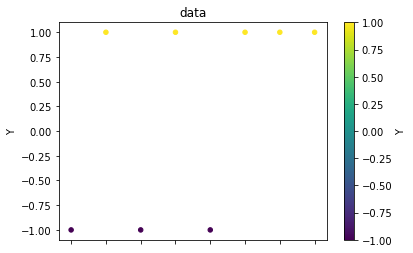

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math
import random as r
from numpy import linalg as LA

data = np.array([[1,1,-1],[1,2,1],[1,3,-1],[1,4,1],[1,5,-1],[1,6,1],[1,7,1],[1,8,1]])

df = pd.DataFrame(data[:,1:], columns=("X", "Y"))
df.plot.scatter(x="X", y="Y", c="Y", cmap='viridis', title="data")

print(data[1,:2])

Gradient Descent algorithm

In [2]:
def gradientDescent1(data, w, iters, learning_rate):
    N = len(data) # represents the rows of data
    updates = 0;  # holds the total updates made to the weights
    
    for c in range(iters):
        acc1 = 0 # holds the summation of the sigma 
        for i in range(N):
            acc1 += ( -data[i][2]*data[i, :2] ) / ( 1 + math.exp( data[i][2] * (w @ data[i, :2]) ) ) 
        g = acc1 / N # the gradient
        v = -g        # the direction to move
        
        # if ||g|| is below a certain threshold then we stop the process
        if LA.norm(g) < 0.03:
            break
        # if not then update the weights
        w = w + learning_rate * v
        updates += 1;
    
    # finally print the findings and return the weights
    print("total updates made to weights:", updates)
    print("final weights:", w)
    print("final solution:", "y =", w[0], "+ (", w[1], "* x )")
    
    return w

# returns the probability of status (fail or pass as specified) give the weights, weeks ,and status
def probability(w, weeks, status):
    return 1 / (1 + math.exp(-status * (w[0] + w[1] * weeks)) )

# a) MY CHOSEN RUN 1: weights = [-1,0.5], iterations: 200, learning rate: 0.01

In [3]:
mw = gradientDescent1(data, [-1, 0.5], 200, 0.01)

total updates made to weights: 113
final weights: [-1.05431162  0.40519424]
final solution: y = -1.0543116211790708 + ( 0.40519424485220573 * x )


The quality of this line is good. It accurately shows that the more days you miss in a class the more your chance of failure approches 1. What i mean by quality is how accurately the solution mimics the data. In the data it seemed that if you only missed a few weeks you could still pass but there were some students who failed. after missing too many weeks it seemed to imply the you would likely fail. So to here when the days missed is at 0 the y value is close to -1 but as you miss more days the value grows. 

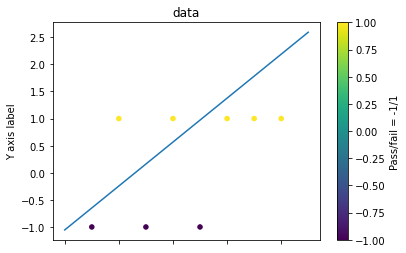

In [4]:
df = pd.DataFrame(data[:,1:], columns=("Days Missed", "Pass/fail = -1/1"))
df.plot.scatter(x="Days Missed", y="Pass/fail = -1/1", c="Pass/fail = -1/1", cmap='viridis', title="data")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

x = np.array(range(10))
y = mw[0] + mw[1] * x
plt.plot(x, y) 

# b) The following are runs with the same weights and iterations but different learning rates:
#        weights = [0,0] ; iterations = 200 ; learning rate = variable

## i: learning rate = 10
this learning rate has too high of an adjustment to the weights and makes the logistic regression line to steam which would give polarizing probabilites for different inputs values. Since its changes to the weight are too large the gradient likely move back and forth more than actually getting more flat. Thus even though this model had 400 iterations it still exhausted them. 

total updates made to weights: 400
final weights: [-23.59593171   7.44243111]
final solution: y = -23.595931707658533 + ( 7.442431113522762 * x )


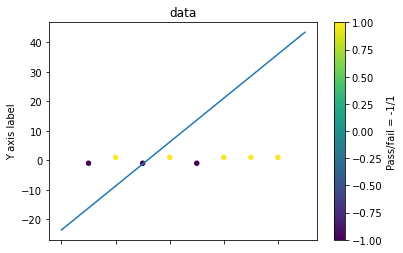

In [5]:
m_w = gradientDescent1(data, [0, 0], 400, 10)

df = pd.DataFrame(data[:,1:], columns=("Days Missed", "Pass/fail = -1/1"))
df.plot.scatter(x="Days Missed", y="Pass/fail = -1/1", c="Pass/fail = -1/1", cmap='viridis', title="data")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

x = np.array(range(10))
y = m_w[0] + m_w[1] * x
plt.plot(x, y) 

## ii: learning rate = 0.1
this learning rate feels much better and has a gradual incline that fits the data much nicer

total updates made to weights: 220
final weights: [-1.04279518  0.40142013]
final solution: y = -1.0427951837276879 + ( 0.40142012751665135 * x )


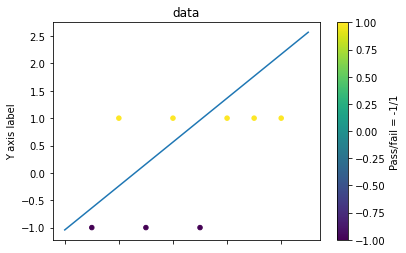

In [6]:
m_w = gradientDescent1(data, [0, 0], 400, 0.1)

df = pd.DataFrame(data[:,1:], columns=("Days Missed", "Pass/fail = -1/1"))
df.plot.scatter(x="Days Missed", y="Pass/fail = -1/1", c="Pass/fail = -1/1", cmap='viridis', title="data")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

x = np.array(range(10))
y = m_w[0] + m_w[1] * x
plt.plot(x, y) 

## iii: learning rate = 0.001
this learning rate is too week and barely adjusts the weights as can be seen by the equation. this creates a regression line that looks very flat and does not fit the data well. more iterations would need to be made but this learning rate has exhausted all its iterations

total updates made to weights: 400
final weights: [0.00032095 0.1720226 ]
final solution: y = 0.00032095063550957706 + ( 0.17202260360355906 * x )


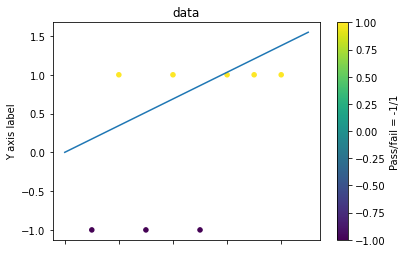

In [7]:
m_w = gradientDescent1(data, [0, 0], 400, 0.001)

df = pd.DataFrame(data[:,1:], columns=("Days Missed", "Pass/fail = -1/1"))
df.plot.scatter(x="Days Missed", y="Pass/fail = -1/1", c="Pass/fail = -1/1", cmap='viridis', title="data")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

x = np.array(range(10))
y = m_w[0] + m_w[1] * x
plt.plot(x, y) 

# c) The following are runs with the same learning rate and iterations but different weights:
#        weights = variable ; iterations = 200 ; learning rate = 0.1

## i) weights = [-10, -10]
as can be seen this model exhausts all iterations and the logistice regresssion line does not fit the data quite as nicely as the solutions found in a)

total updates made to weights: 400
final weights: [-5.16723795  1.29134418]
final solution: y = -5.167237954596036 + ( 1.291344175115994 * x )


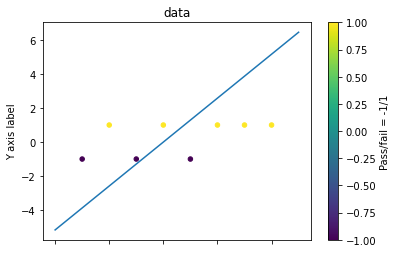

In [8]:
m_w = gradientDescent1(data, [-10, -10], 400, 0.1)

df = pd.DataFrame(data[:,1:], columns=("Days Missed", "Pass/fail = -1/1"))
df.plot.scatter(x="Days Missed", y="Pass/fail = -1/1", c="Pass/fail = -1/1", cmap='viridis', title="data")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

x = np.array(range(10))
y = m_w[0] + m_w[1] * x
plt.plot(x, y) 

## ii) weights = [-1, 0]
this model uses weight similar to that of the solution found in a) and likewise finds a solution that fits the data pretty well

total updates made to weights: 36
final weights: [-1.04376691  0.40161571]
final solution: y = -1.0437669081226373 + ( 0.40161571208941466 * x )


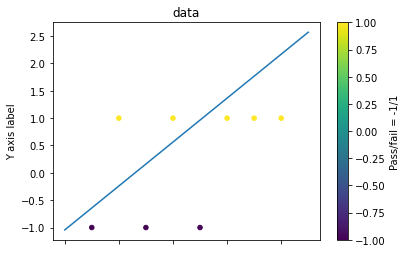

In [9]:
m_w = gradientDescent1(data, [-1, 0], 400, 0.1)

df = pd.DataFrame(data[:,1:], columns=("Days Missed", "Pass/fail = -1/1"))
df.plot.scatter(x="Days Missed", y="Pass/fail = -1/1", c="Pass/fail = -1/1", cmap='viridis', title="data")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

x = np.array(range(10))
y = m_w[0] + m_w[1] * x
plt.plot(x, y) 

## iii) weights = [10, 20]
this model suffers from the same things. the weights are very far from optimal and so the given iterations was not enough to adjust them to an optimal state

total updates made to weights: 400
final weights: [0.27453851 0.14552709]
final solution: y = 0.2745385125547576 + ( 0.14552709338209677 * x )


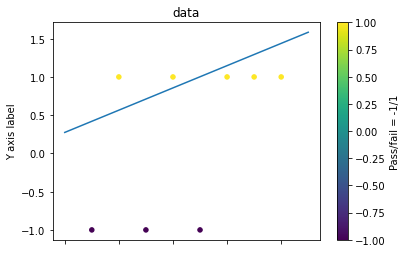

In [10]:
m_w = gradientDescent1(data, [10, 20], 400, 0.1)

df = pd.DataFrame(data[:,1:], columns=("Days Missed", "Pass/fail = -1/1"))
df.plot.scatter(x="Days Missed", y="Pass/fail = -1/1", c="Pass/fail = -1/1", cmap='viridis', title="data")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

x = np.array(range(10))
y = m_w[0] + m_w[1] * x
plt.plot(x, y) 

# d) Here we show the chances of pass and failing for missing (i) 3 weeks of class and (ii) 5 weeks of class

In [11]:
test = [1,3]
print('3 weeks')
print("\tthe probability of failing: ", end="")
print(100 / (1 + math.exp(-1 * (mw[0] * test[0] + mw[1] * test[1])) ), '%')
print("\tthe probability of passing: ", end="")
print(100 / (1 + math.exp(1 * (mw[0] * test[0] + mw[1] * test[1])) ), '%')
test = [1,5]
print('5 weeks')
print("\tthe probability of failing: ", end="")
print(100 / (1 + math.exp(-1 * (mw[0] * test[0] + mw[1] * test[1])) ), '%')
print("\tthe probability of passing: ", end="")
print(100 / (1 + math.exp(1 * (mw[0] * test[0] + mw[1] * test[1])) ), '%')

3 weeks
	the probability of failing: 54.023062170278926 %
	the probability of passing: 45.976937829721074 %
5 weeks
	the probability of failing: 72.54501682697166 %
	the probability of passing: 27.454983173028346 %


so its seems that in both case you are more likely to fail than not, but missing 5 weeks has a significantly higher chance of failure that 3 weeks

# e) 
Q) Can logistic regression be used for classification? If not, explain why. If yes, show how your solution in part (a) above would classify the points X = 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5.State assumption(s), if any, that you make.

A) logistic regression does not classify in the sense that it determines wheather the output of some inputs is +1 or -1 but it generates a probability for being -1 or being 1. Its not like linear regression where any data point above a line or hyper plane is determined as class 'a' and any data point below is determined as 'b'. However it can show what class has higher probability. 

so the probability of passing and failing for x values 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5 are display below

In [12]:
for i in range(1,8):
    print('x = ',i+0.5,":")
    print('\tpass:', 100 * probability(mw, i+0.5, -1), end='%\n')
    print('\tfail:', 100 * probability(mw, i+0.5, 1), end='%\n')

x =  1.5 :
	pass: 60.98115753254375%
	fail: 39.01884246745625%
x =  2.5 :
	pass: 51.03300321346512%
	fail: 48.966996786534885%
x =  3.5 :
	pass: 41.002349870954305%
	fail: 58.997650129045695%
x =  4.5 :
	pass: 31.6681945409184%
	fail: 68.3318054590816%
x =  5.5 :
	pass: 23.60864231815139%
	fail: 76.39135768184862%
x =  6.5 :
	pass: 17.087325206207655%
	fail: 82.91267479379233%
x =  7.5 :
	pass: 12.082452567911146%
	fail: 87.91754743208885%


assumption: I believe your asking if logistic regression can classify the same way that linear regression does to which i answer no it give probilities. I have provided the pass and fail probabilities for the x values just in case im wrong. 

# f) 
Q. If there were two or more rows in the given data set with the same x–value but different y-values (e.g., (X=3, Y= 1) and (X=3, Y= 0or -1)), would we still be able to obtain a valid logistic regression of Y on X, or would logistic regression make no sense in that case? 

A. It would still make sense but it would influence the probabilities. 